In [1]:
from new_mps_utils import * 
from wave_circuit import * 
import matplotlib.pyplot as plt 
import pickle

In [2]:
f1 = lambda x :  np.exp(-(x-0.45)**2/0.01)
df1 = lambda x: ( -2 * (x-0.45)/(0.01) ) * f1(x)

f2 = lambda x :  (x-0.45)/0.05 * f1(x)
df2 = lambda x: (x-0.45)/0.05 * df1(x) + 1/0.05 * f1(x)

f3 = lambda x: (1-(x-0.45)**2/0.01) * f1(x)
df3 = lambda x: -2*(x-0.45)/0.01 * f1(x) + (1-(x-0.45)**2/0.01)*df1(x)

m = 5
l = 2**m
x_coarse = np.linspace(0,1,l+1)

In [3]:
p1 = get_polys(x_coarse,f1,df1)
p2 = get_polys(x_coarse,f2,df2)
p3 = get_polys(x_coarse,f3,df3)

def apply(p,x):
    return np.dot(p,[x**i for i in range(len(p))])

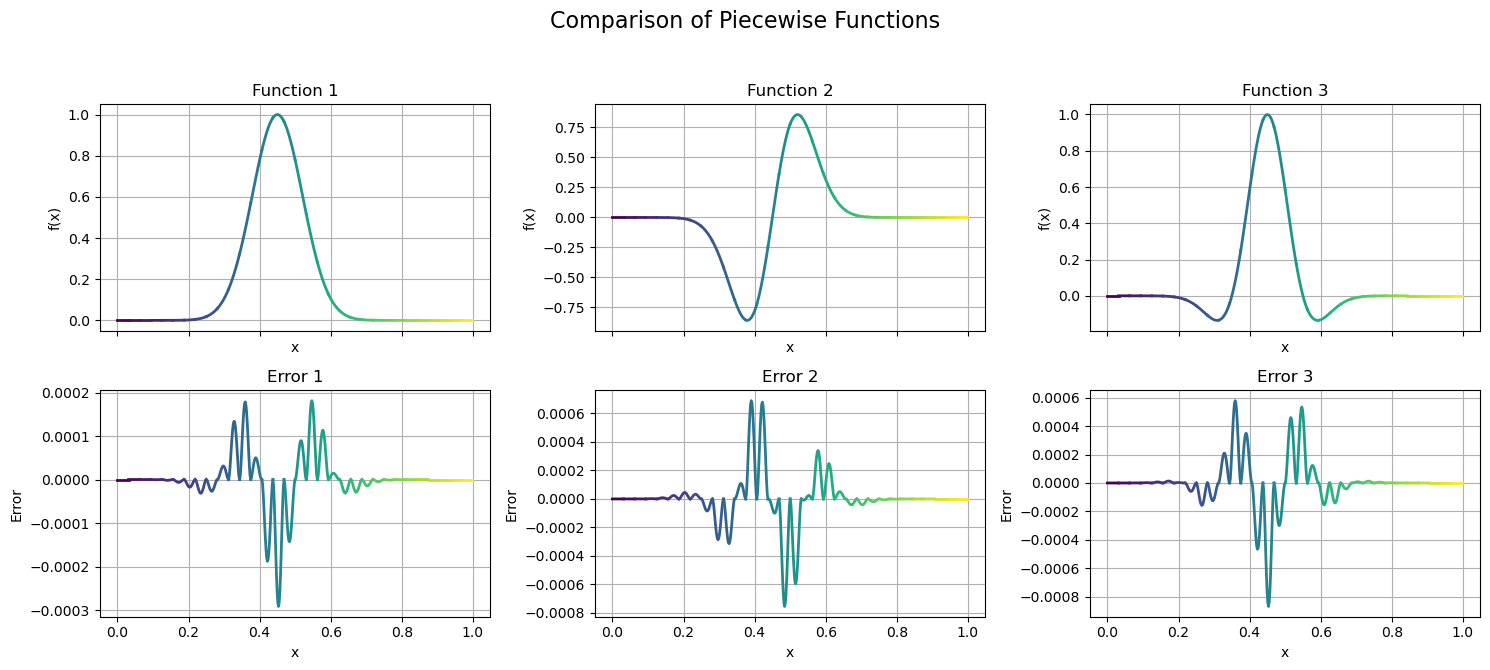

In [4]:

n = 9
N = 2**n
x = np.linspace(0, 1 - 1/N, N)

fig, ax = plt.subplots(2, 3, figsize=(15, 7),sharex=True)

# Titles for subplots
titles = ['Function 1', 'Function 2', 'Function 3']
colors = plt.cm.viridis(np.linspace(0, 1, l))  # 16 shades for curves

for idx, v in enumerate(p1):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][0].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][0].set_title(titles[0])
    ax[0][0].grid(True)

for idx, v in enumerate(p2):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][1].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][1].set_title(titles[1])
    ax[0][1].grid(True)

for idx, v in enumerate(p3):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[0][2].plot(xi, apply(v, xi), color=colors[idx], linewidth=2)
    ax[0][2].set_title(titles[2])
    ax[0][2].grid(True)

for a in ax[0]:
    a.set_xlabel('x')
    a.set_ylabel('f(x)')

titles = ['Error 1', 'Error 2', 'Error 3']

for idx, v in enumerate(p1):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][0].plot(xi, apply(v, xi)-f1(xi), color=colors[idx], linewidth=2)
    ax[1][0].set_title(titles[0])
    ax[1][0].grid(True)

for idx, v in enumerate(p2):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][1].plot(xi, apply(v, xi)-f2(xi), color=colors[idx], linewidth=2)
    ax[1][1].set_title(titles[1])
    ax[1][1].grid(True)

for idx, v in enumerate(p3):
    xi = x[idx * N // l : (idx + 1) * N // l + 1]
    ax[1][2].plot(xi, apply(v, xi)-f3(xi), color=colors[idx], linewidth=2)
    ax[1][2].set_title(titles[2])
    ax[1][2].grid(True)

for a in ax[1]:
    a.set_xlabel('x')
    a.set_ylabel('Error')

fig.suptitle('Comparison of Piecewise Functions', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Figures/PiecewiseRep.pdf',dpi=300)
plt.show()

In [5]:
M_list1 = []
for i,p in enumerate(p1):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list1.append(M)

M_full1 = (reduce(lambda a,b: MPS_sum(a,b),M_list1))

M_list2 = []
for i,p in enumerate(p2):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list2.append(M)

M_full2 = (reduce(lambda a,b: MPS_sum(a,b),M_list2))

M_list3 = []
for i,p in enumerate(p3):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list3.append(M)

M_full3 = (reduce(lambda a,b: MPS_sum(a,b),M_list3))

M_final1 = trunc_mps(M_full1,4)
M_final2 = trunc_mps(M_full2,4)
M_final3 = trunc_mps(M_full3,4)

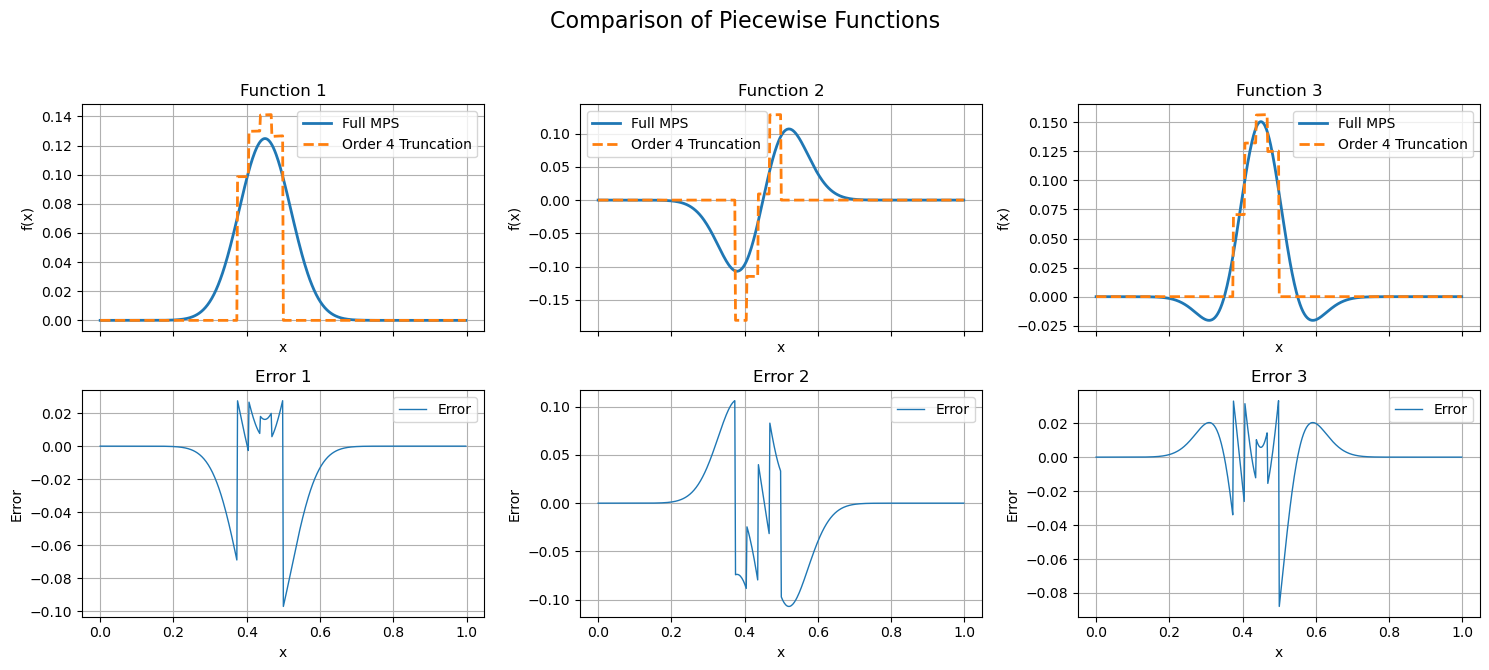

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), sharex=True)

# Titles for subplots
titles = ['Function 1', 'Function 2', 'Function 3']

# Row 0: Function comparisons
ax[0][0].plot(x, get_state(M_full1)/np.linalg.norm(get_state(M_full1)), label='Full MPS', linewidth=2)
ax[0][0].plot(x, get_state(M_final1), '--', label='Order 4 Truncation', linewidth=2)
ax[0][0].set_title(titles[0])
ax[0][0].grid(True)
ax[0][0].legend()

ax[0][1].plot(x, get_state(M_full2)/np.linalg.norm(get_state(M_full2)), label='Full MPS', linewidth=2)
ax[0][1].plot(x, get_state(M_final2), '--', label='Order 4 Truncation', linewidth=2)
ax[0][1].set_title(titles[1])
ax[0][1].grid(True)
ax[0][1].legend()

ax[0][2].plot(x, get_state(M_full3)/np.linalg.norm(get_state(M_full3)), label='Full MPS', linewidth=2)
ax[0][2].plot(x, get_state(M_final3), '--', label='Order 4 Truncation', linewidth=2)
ax[0][2].set_title(titles[2])
ax[0][2].grid(True)
ax[0][2].legend()

# Axes labels
for a in ax[0]:
    a.set_xlabel('x')
    a.set_ylabel('f(x)')

# Row 1: Error plots
titles = ['Error 1', 'Error 2', 'Error 3']

ax[1][0].plot(x, get_state(M_final1) - f1(x)/np.linalg.norm(f1(x)), label='Error', linewidth=1)
ax[1][0].set_title(titles[0])
ax[1][0].grid(True)
ax[1][0].legend()

ax[1][1].plot(x, get_state(M_final2) - f2(x)/np.linalg.norm(f2(x)), label='Error', linewidth=1)
ax[1][1].set_title(titles[1])
ax[1][1].grid(True)
ax[1][1].legend()

ax[1][2].plot(x, get_state(M_final3) - f3(x)/np.linalg.norm(f3(x)), label='Error', linewidth=1)
ax[1][2].set_title(titles[2])
ax[1][2].grid(True)
ax[1][2].legend()

# Axes labels
for a in ax[1]:
    a.set_xlabel('x')
    a.set_ylabel('Error')

fig.suptitle('Comparison of Piecewise Functions', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Figures/MPS4Rep.pdf', dpi=300)
plt.show()

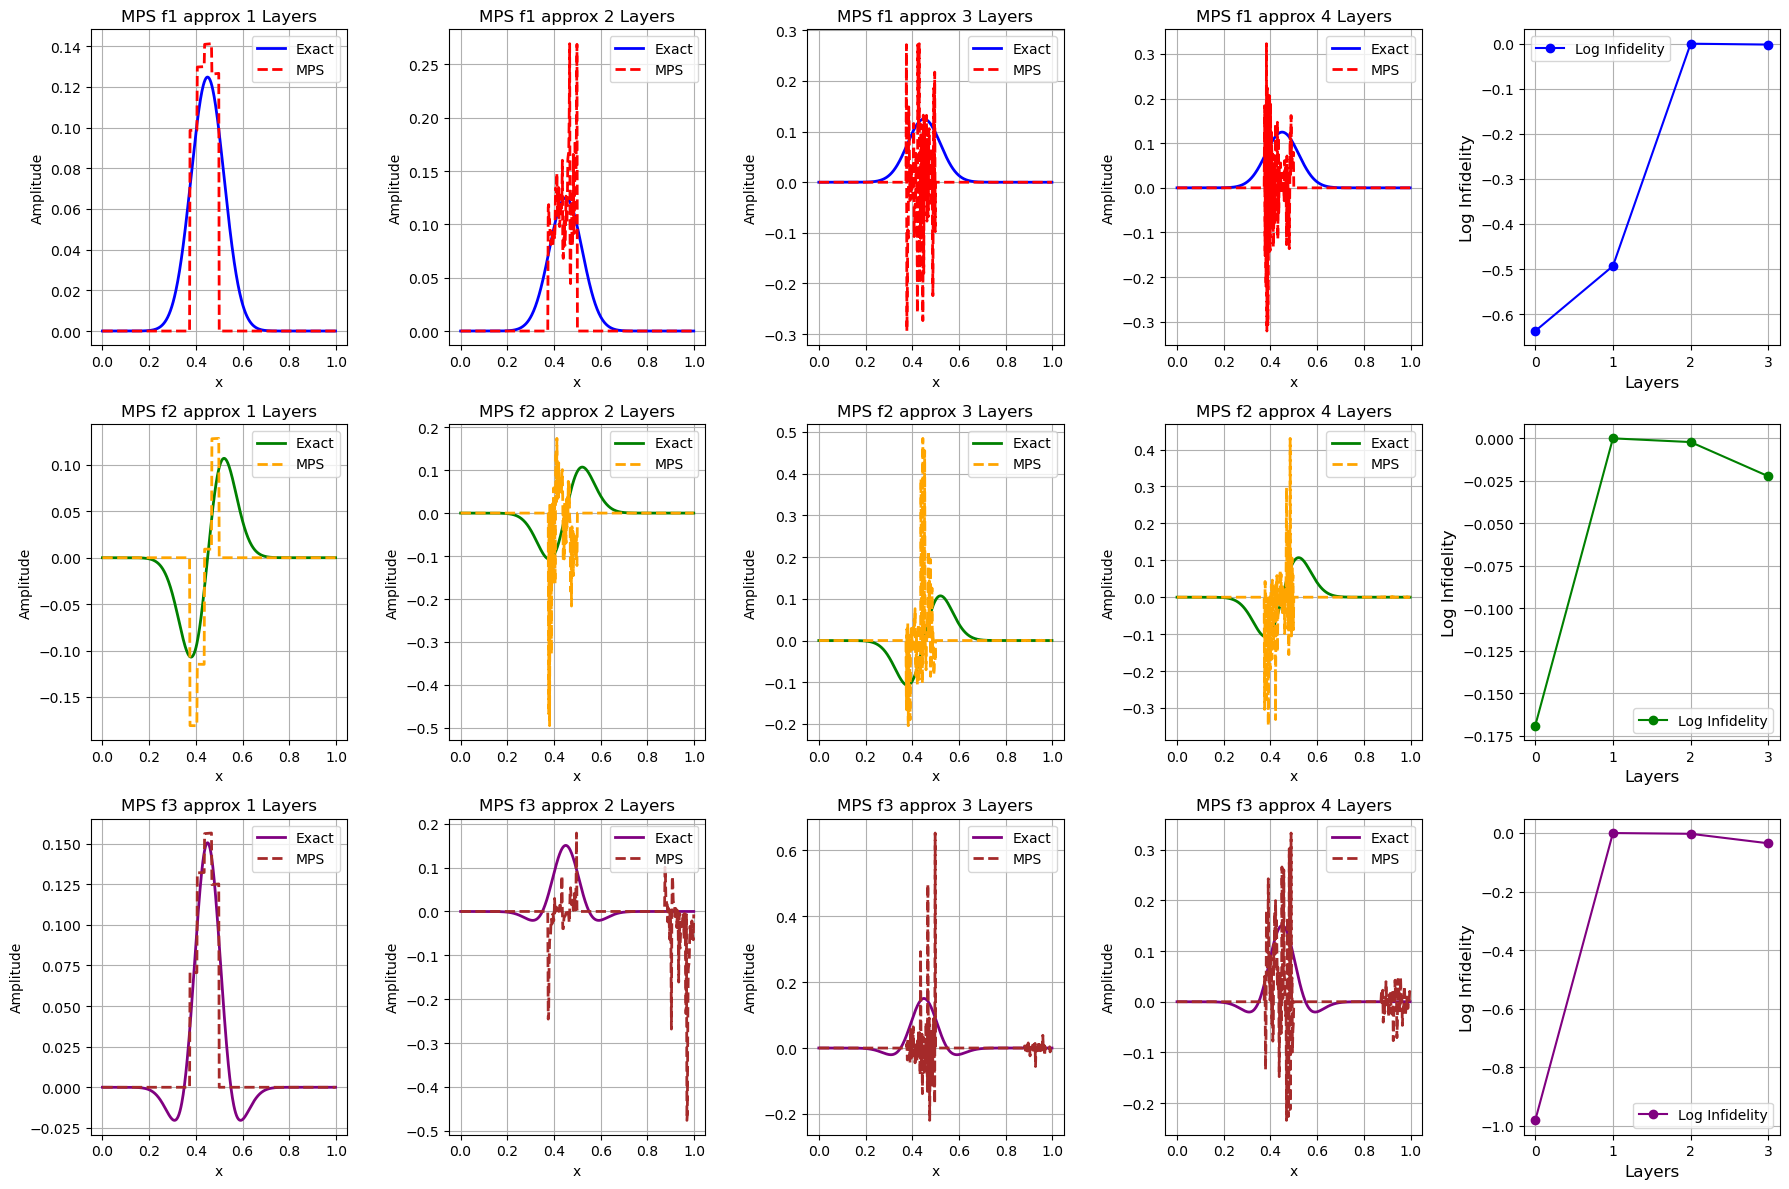

In [7]:
from qiskit.quantum_info import Statevector
fig, ax = plt.subplots(3, 5, figsize=(18, 12))  # Larger figure for better clarity

# Customizing plot appearance
inner1 = []
inner2 = []
inner3 = []

layers1 = []
layers2 = []
layers3 = []
for i in range(4):
    # First row (f1)
    ax[0][i].plot(x, f1(x) / np.linalg.norm(f1(x)), label='Exact', color='b', linewidth=2)
    g = get_layers(M_final1, i + 1)
    layers1.append(g)
    ax[0][i].plot(x, Statevector(circ_from_layers(g).reverse_bits()).data.real, '--', label='MPS', color='r', linewidth=2)
    inner1.append(1 - Statevector(circ_from_layers(g).reverse_bits()).data.real.dot(f1(x) / np.linalg.norm(f1(x)))**2)
    ax[0][i].set_title(f"MPS f1 approx {i+1} Layers")
    ax[0][i].set_xlabel('x')
    ax[0][i].set_ylabel('Amplitude')
    ax[0][i].grid(True)
    ax[0][i].legend(loc='upper right', fontsize=10)

    # Second row (f2)
    ax[1][i].plot(x, f2(x) / np.linalg.norm(f2(x)), label='Exact', color='g', linewidth=2)
    g = get_layers(M_final2, i + 1)
    layers2.append(g)
    ax[1][i].plot(x, Statevector(circ_from_layers(g).reverse_bits()).data.real, '--', label='MPS', color='orange', linewidth=2)
    inner2.append(1 - Statevector(circ_from_layers(g).reverse_bits()).data.real.dot(f2(x) / np.linalg.norm(f2(x)))**2)
    ax[1][i].set_title(f"MPS f2 approx {i+1} Layers")
    ax[1][i].set_xlabel('x')
    ax[1][i].set_ylabel('Amplitude')
    ax[1][i].grid(True)
    ax[1][i].legend(loc='upper right', fontsize=10)

    # Third row (f3)
    ax[2][i].plot(x, f3(x) / np.linalg.norm(f3(x)), label='Exact', color='purple', linewidth=2)
    g = get_layers(M_final3, i + 1)
    layers3.append(g)
    ax[2][i].plot(x, Statevector(circ_from_layers(g).reverse_bits()).data.real, '--', label='MPS', color='brown', linewidth=2)
    inner3.append(1 - Statevector(circ_from_layers(g).reverse_bits()).data.real.dot(f3(x) / np.linalg.norm(f3(x)))**2)
    ax[2][i].set_title(f"MPS f3 approx {i+1} Layers")
    ax[2][i].set_xlabel('x')
    ax[2][i].set_ylabel('Amplitude')
    ax[2][i].grid(True)
    ax[2][i].legend(loc='upper right', fontsize=10)

# Log Infidelity plots for each row
ax[0][4].plot(np.log10(np.abs(inner1)), '-o', color='b', markersize=6, label='Log Infidelity')
ax[0][4].set_xlabel('Layers', fontsize=12)
ax[0][4].set_ylabel('Log Infidelity', fontsize=12)
ax[0][4].grid(True)
ax[0][4].legend(fontsize=10)

ax[1][4].plot(np.log10(np.abs(inner2)), '-o', color='g', markersize=6, label='Log Infidelity')
ax[1][4].set_xlabel('Layers', fontsize=12)
ax[1][4].set_ylabel('Log Infidelity', fontsize=12)
ax[1][4].grid(True)
ax[1][4].legend(fontsize=10)

ax[2][4].plot(np.log10(np.abs(inner3)), '-o', color='purple', markersize=6, label='Log Infidelity')
ax[2][4].set_xlabel('Layers', fontsize=12)
ax[2][4].set_ylabel('Log Infidelity', fontsize=12)
ax[2][4].grid(True)
ax[2][4].legend(fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig("Figures/Initializations.pdf",dpi=300)
# Show the plot
plt.show()

In [ ]:
with open("mps_trunc", "wb") as f:
    pickle.dump([layers1,layers2,layers3], f)

In [ ]:
grad_layers1, layer_hist1, grad_opts1 = optimize_layers(4,M_final1,5000)

In [ ]:
for o in grad_opts1:
    plt.plot(np.log10(o),label=f'Layer {i}')
plt.xlabel('Iteration')
plt.ylabel('Log Infidelity')

In [ ]:
grad_layers2, layer_hist2, grad_opts2 = optimize_layers(4,M_final2,5000)

In [ ]:
for o in grad_opts2:
    plt.plot(np.log10(o),label=f'Layer {i}')
plt.xlabel('Iteration')
plt.ylabel('Log Infidelity')

In [ ]:
grad_layers3, layer_hist3, grad_opts3 = optimize_layers(4,M_final3,5000)

In [ ]:
for o in grad_opts3:
    plt.plot(np.log10(o),label=f'Layer {i}')
plt.xlabel('Iteration')
plt.ylabel('Log Infidelity')

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle("Circuit vs Exact States and Errors", fontsize=16)

functions = [f1, f2, f3]
mps_list = [M_final1, M_final2, M_final3]
grad_layers_list = [grad_layers1, grad_layers2, grad_layers3]
layers_list = [layers1,layers2,layers3]
titles = ['Function 1', 'Function 2', 'Function 3']

for i in range(3):
    exact = functions[i](x) / np.linalg.norm(functions[i](x))
    circuit = Statevector(circ_from_layers(layers_list[i][-1]).reverse_bits()).data.real
    gradient = Statevector(circ_from_layers(grad_layers_list[i]).reverse_bits()).data.real

    # Top row: actual states
    ax[0, i].plot(exact, label='Exact', linewidth=2)
    ax[0, i].plot(circuit, '--', label='Circuit')
    ax[0, i].plot(gradient, '--', label='Circuit With Gradient')
    ax[0, i].set_title(titles[i])
    ax[0, i].set_ylabel("Amplitude")
    ax[0, i].legend()
    ax[0, i].grid(True)

    # Bottom row: errors
    ax[1, i].plot(circuit - exact, '--', label='Error')
    ax[1, i].plot(gradient - exact, '--', label='Error With Gradient')
    ax[1, i].set_xlabel("Index")
    ax[1, i].set_ylabel("Error")
    ax[1, i].legend()
    ax[1, i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.savefig("Figures/MPSOptRep.pdf",dpi=300)
plt.show()

In [ ]:
grad_inner1 = []
for i in range(4):
    grad_inner1.append(1 - Statevector(circ_from_layers(layer_hist1[i]).reverse_bits()).data.real.dot(f1(x) / np.linalg.norm(f1(x)))**2)
    
grad_inner2 = []
for i in range(4):
    grad_inner2.append(1 - Statevector(circ_from_layers(layer_hist2[i]).reverse_bits()).data.real.dot(f2(x) / np.linalg.norm(f2(x)))**2)
    
grad_inner3 = []
for i in range(4):
    grad_inner3.append(1 - Statevector(circ_from_layers(layer_hist3[i]).reverse_bits()).data.real.dot(f3(x) / np.linalg.norm(f3(x)))**2)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

colors = ['tab:blue', 'tab:green', 'tab:purple']
labels = ['Function 1', 'Function 2', 'Function 3']
inners = [inner1, inner2, inner3]
grad_inners = [grad_inner1, grad_inner2, grad_inner3]

for i in range(3):
    ax[i].plot(np.log10(inners[i]), '--o', color=colors[i], label='Original')
    ax[i].plot(np.log10(grad_inners[i]), '-o', color=colors[i], label='With Gradient', alpha=0.8)
    ax[i].set_title(labels[i])
    ax[i].set_xlabel("Layers")
    ax[i].grid(True)
    ax[i].legend()

ax[0].set_ylabel("Log Fidelity")
fig.suptitle("Comparison of Infidelity With and Without Gradient", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Figures/GradInfidComp.pdf",dpi=300)
plt.show()

In [ ]:
with open("mps_opt", "wb") as f:
    pickle.dump([grad_layers1,grad_layers2,grad_layers3], f)